In [22]:
#training deep neural networks on gpu if you have a gpu but if you dont then on cpu

In [23]:
import torch
import numpy as np
import torchvision
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt

In [24]:
#download dataset, but i already have it downloaded
dataset = MNIST(root='data/', train=True, transform=ToTensor())

In [25]:
#validation set

def split_indices(n, val_pct):
    pct_gone = int(n*val_pct)
    print(pct_gone)
    idxs = np.random.permutation(n)
    #so from 12,000 images to the end - we set the training dataset to those random permutations
    return idxs[pct_gone:], idxs[:pct_gone]

In [26]:
train_indices, val_indices = split_indices(len(dataset), 0.2)

12000


In [27]:
img, label = dataset[0]

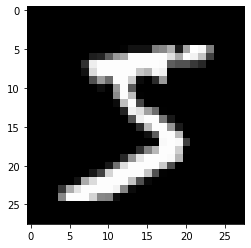

In [28]:
plt.imshow(img[0], cmap='gray')

In [29]:
#we will randomize the position of the data, in order to lessen the biases
#we will create batches out of the indices that are specified below
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset, 100, sampler=train_sampler)

In [30]:
#we will create batches out of the indices that are specified below
#it will do a random shuffle opf the data, gradient descent works better when you randomize the data

#we need a validation set to test the model on data that it hasn't seen, and then you can tweak the hyperparams
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, 100, sampler=val_sampler)

In [31]:
#nn.Linear takes inputs and outputs, creates weights and biases, bases of linear and logistic regression
#you need to flatten it out to a vector of size 784
#the outputs are the probabilites of the numbers being the correct prediction

In [40]:
#Now, in the deep learning neural network we are creating: 
    #we will use 2 nn.Linear objects. Each one acts as a hidden layer inside the model
    #the first layer, nn.Linear, wil transform the input matrix, which has already been reshaped to batch * 784
        #to now it will be batch * hidden_size, which hidden_size is a preconfigured parameter, like 32 or 64
        
    #the intermediate outputs of the layer are passed on to the activation function, which operates on individual
    #elements of the output vector
    
    #The result of the activation function is then passed on to the second layer:
        #The second layer transforms the output into batch_size * 10, identical to the logistic regression model
        
#differences between this and logistic regression:
    #logistic regression model takes in an image, and uses something called cross_entropy to caclulate the loss
    #which is then put back into the model in order to optimize the function. The forward function, which is re
    #-sponsible for outputting the alterations it does to the inputs in order for the data to be used to calc-
    #-ulate the gradients, reshapes the data into -1,784 (-1 is kinda a placeholder), and then it returns the 
    #nn.linear model with the correct input and output layer
    #cross entropy does its own softmax in order to convert it into probabilities
    

    #just like how linear regression and logistic regression are similar, because logistic regression is predic-
    #-ting the probability of a certain item being the correct answer 
    
   